In [174]:
from tensorflow import keras
import numpy as np

In [188]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13129652286286985020
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 16953086527539454104
physical_device_desc: "device: XLA_CPU device"
]


### Viewing and Structuring the Data

In [23]:
! ls /datarepo/Seagate\ Backup\ Plus\ Drive/ifcb_data/home/coolgroup/ANTARCTICA/PAL-LTER/Station/2017-2018/IFCB/Data/PAL1718_LTER/x171127B/ecotaxa/D20171127T182512_IFCB116/D20171127T182512_IFCB116_00002.png

/datarepo/Seagate Backup Plus Drive/ifcb_data/home/coolgroup/ANTARCTICA/PAL-LTER/Station/2017-2018/IFCB/Data/PAL1718_LTER/x171127B/ecotaxa/D20171127T182512_IFCB116/D20171127T182512_IFCB116_00002.png


In [4]:
! ls ../../../Data/

ecotaxa_export_3203_20200731_1928.tsv


In [1]:
fp = '/datarepo/Seagate\ Backup\ Plus\ Drive/ifcb_data/home/coolgroup/ANTARCTICA/PAL-LTER/Station/2017-2018/IFCB/Data/PAL1718_LTER/x171127B'
fp

'/datarepo/Seagate\\ Backup\\ Plus\\ Drive/ifcb_data/home/coolgroup/ANTARCTICA/PAL-LTER/Station/2017-2018/IFCB/Data/PAL1718_LTER/x171127B'

In [24]:
fp = '/datarepo/Seagate Backup Plus Drive/ifcb_data/home/coolgroup/ANTARCTICA/PAL-LTER/Station/2017-2018/IFCB/Data/PAL1718_LTER/x171127B/ecotaxa/D20171127T182512_IFCB116/D20171127T182512_IFCB116_00002.png'
fp

'/datarepo/Seagate Backup Plus Drive/ifcb_data/home/coolgroup/ANTARCTICA/PAL-LTER/Station/2017-2018/IFCB/Data/PAL1718_LTER/x171127B/ecotaxa/D20171127T182512_IFCB116/D20171127T182512_IFCB116_00002.png'

In [6]:
import pandas as pd

In [7]:
img_md = pd.read_csv('../../../Data//ecotaxa_export_3203_20200731_1928.tsv', sep='\t')

/root/miniconda3/envs/earthml/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (5,9,10,262,263) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
'object_lat', 'object_lon', 'object_date', 'object_time'

('object_lat', 'object_lon', 'object_date', 'object_time')

In [9]:
img_md_subset = img_md[['object_id','object_annotation_status', 'object_annotation_category', 'object_annotation_hierarchy', 'sample_flag', 'object_lat', 'object_lon', 'object_date', 'object_time']]

In [10]:
img_md_subset.to_csv('../../../Data/ifcb_ecotaxa_subset.csv')

In [ ]:
del img_md

In [17]:
img_md_subset

,object_id,object_annotation_status,object_annotation_category,object_annotation_hierarchy,sample_flag,object_lat,object_lon,object_date,object_time
0,D20180221T193119_IFCB116_01153,validated,Pyramimonas,living>Eukaryota>Archaeplastida>Viridiplantae>...,good,-64.7535,-64.1339,20180221,193119
1,D20180221T202431_IFCB116_00153,validated,Gymnodinium,living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...,good,-64.7741,-64.1655,20180221,202431
2,D20180221T202431_IFCB116_01303,validated,Gymnodinium,living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...,good,-64.7741,-64.1655,20180221,202431
3,D20180221T202431_IFCB116_03008,validated,Katodinium,living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...,good,-64.7741,-64.1655,20180221,202431
4,D20180221T212254_IFCB116_07034,validated,Pyramimonas,living>Eukaryota>Archaeplastida>Viridiplantae>...,good,-64.7802,-63.9785,20180221,212254
...,...,...,...,...,...,...,...,...,...
1463891,D20181227T155007_IFCB116_03484,predicted,part<other,living>other>part,good,-64.8138,-64.0417,20181227,155007
1463892,D20181227T155007_IFCB116_03485,predicted,badfocus<artefact,not-living>artefact>badfocus,good,-64.8138,-64.0417,20181227,155007
1463893,D20181227T155007_IFCB116_03486,predicted,t002,temporary>t002,good,-64.8138,-64.0417,20181227,155007
1463894,D20181227T155007_IFCB116_03487,predicted,t002,temporary>t002,good,-64.8138,-64.0417,20181227,155007


In [22]:
img_md_subset['object_date']

0          20180221
1          20180221
2          20180221
3          20180221
4          20180221
             ...   
1463891    20181227
1463892    20181227
1463893    20181227
1463894    20181227
1463895    20181227
Name: object_date, Length: 1463896, dtype: int64

In [92]:
img_md_subset[img_md_subset['object_date'] == 20180222]

,object_id,object_annotation_status,object_annotation_category,object_annotation_hierarchy,sample_flag,object_lat,object_lon,object_date,object_time,geometry
33,D20180222T001905_IFCB116_01617,validated,Pyramimonas,living>Eukaryota>Archaeplastida>Viridiplantae>...,questionnable,-64.8149,-64.0402,20180222,1905,POINT (-64.04020 -64.81490)
34,D20180222T001905_IFCB116_02038,validated,Gymnodinium,living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...,questionnable,-64.8149,-64.0402,20180222,1905,POINT (-64.04020 -64.81490)
4388,D20180222T175933_IFCB116_01723,validated,Ciliophora,living>Eukaryota>Harosa>Alveolata>Ciliophora,incomplete,-64.8138,-64.0417,20180222,175933,POINT (-64.04170 -64.81380)
4389,D20180222T175933_IFCB116_05707,validated,Ciliophora,living>Eukaryota>Harosa>Alveolata>Ciliophora,incomplete,-64.8138,-64.0417,20180222,175933,POINT (-64.04170 -64.81380)
4390,D20180222T175933_IFCB116_05518,validated,Licmophora,living>Eukaryota>Harosa>Stramenopiles>Ochrophy...,incomplete,-64.8138,-64.0417,20180222,175933,POINT (-64.04170 -64.81380)
...,...,...,...,...,...,...,...,...,...,...
1174457,D20180222T195441_IFCB116_02900,predicted,t002,temporary>t002,good,-64.8138,-64.0417,20180222,195441,POINT (-64.04170 -64.81380)
1174458,D20180222T195441_IFCB116_02901,predicted,pennate 2 temp,living>Eukaryota>Harosa>Stramenopiles>Ochrophy...,good,-64.8138,-64.0417,20180222,195441,POINT (-64.04170 -64.81380)
1174459,D20180222T195441_IFCB116_02902,predicted,t002,temporary>t002,good,-64.8138,-64.0417,20180222,195441,POINT (-64.04170 -64.81380)
1174460,D20180222T195441_IFCB116_02903,predicted,badfocus<artefact,not-living>artefact>badfocus,good,-64.8138,-64.0417,20180222,195441,POINT (-64.04170 -64.81380)


In [25]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(img_md_subset['object_lon'], img_md_subset['object_lat'])]
gdf = GeoDataFrame(img_md_subset, geometry=geometry)   
gdf.head()

In [47]:
?world.plot

<AxesSubplot:>

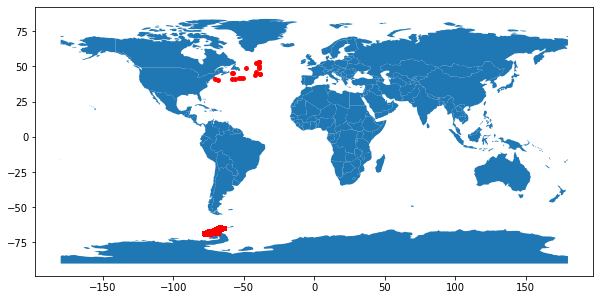

In [49]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(figsize=(10, 6), ax=ax)
gdf.sample(n=10000).plot(ax=ax, marker='o', color='red', markersize=15)

(-90.0, -40.0)

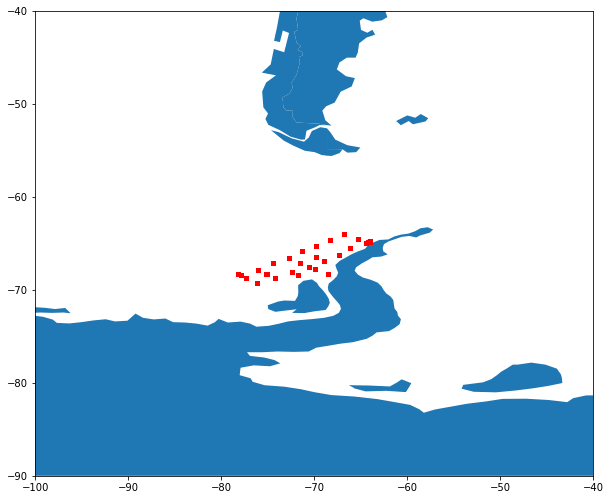

In [56]:
fig, ax = plt.subplots(figsize=(10, 10))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(figsize=(10, 6), ax=ax)
gdf.sample(n=20000).plot(ax=ax, marker='o', color='red', markersize=15)

ax.set_xlim(-100, -40)
ax.set_ylim(-90,-40)

(-70.0, -63.5)

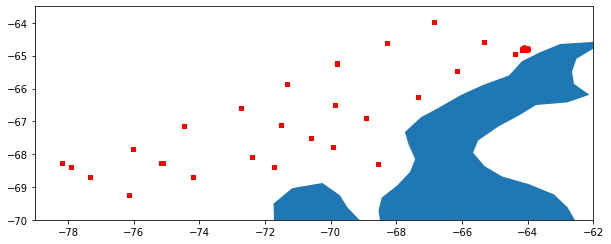

In [60]:
fig, ax = plt.subplots(figsize=(10, 10))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(figsize=(10, 6), ax=ax)
gdf.sample(n=20000).plot(ax=ax, marker='o', color='red', markersize=15)

ax.set_xlim(-79, -62)
ax.set_ylim(-70,-63.5)

In [97]:
img_md_subset.groupby('object_date')['object_id'].nunique()

object_date
20170830       50
20170831      163
20170901      136
20170902      115
20170903       62
            ...  
20190117    30428
20190121    25725
20190122    52282
20190124    20945
20190125    23892
Name: object_id, Length: 91, dtype: int64

In [66]:
unique_validated = img_md_subset[img_md_subset.object_annotation_status == 'validated'].groupby('object_annotation_category')['object_id'].nunique()
unique_validated

object_annotation_category
Amphiprora                  453
Ceratium                    219
Chaetoceros<Mediophyceae    624
Ciliophora                  504
Cocconeis                    14
                           ... 
t014                         12
t015                         24
t016                         72
t017                          9
t018                         57
Name: object_id, Length: 79, dtype: int64

Filter this data to only use validated and other filters TODO

In [240]:
val_subset = img_md_subset[img_md_subset.object_annotation_status == 'validated']
val_subset

,object_id,object_annotation_status,object_annotation_category,object_annotation_hierarchy,sample_flag,object_lat,object_lon,object_date,object_time,geometry
0,D20180221T193119_IFCB116_01153,validated,Pyramimonas,living>Eukaryota>Archaeplastida>Viridiplantae>...,good,-64.7535,-64.1339,20180221,193119,POINT (-64.13390 -64.75350)
1,D20180221T202431_IFCB116_00153,validated,Gymnodinium,living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...,good,-64.7741,-64.1655,20180221,202431,POINT (-64.16550 -64.77410)
2,D20180221T202431_IFCB116_01303,validated,Gymnodinium,living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...,good,-64.7741,-64.1655,20180221,202431,POINT (-64.16550 -64.77410)
3,D20180221T202431_IFCB116_03008,validated,Katodinium,living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...,good,-64.7741,-64.1655,20180221,202431,POINT (-64.16550 -64.77410)
4,D20180221T212254_IFCB116_07034,validated,Pyramimonas,living>Eukaryota>Archaeplastida>Viridiplantae>...,good,-64.7802,-63.9785,20180221,212254,POINT (-63.97850 -64.78020)
...,...,...,...,...,...,...,...,...,...,...
1461617,D20181227T155007_IFCB116_01188,validated,centric 1 temp,living>Eukaryota>Harosa>Stramenopiles>Ochrophy...,good,-64.8138,-64.0417,20181227,155007,POINT (-64.04170 -64.81380)
1462310,D20181227T155007_IFCB116_01886,validated,t002,temporary>t002,good,-64.8138,-64.0417,20181227,155007,POINT (-64.04170 -64.81380)
1462389,D20181227T155007_IFCB116_01966,validated,Ciliophora,living>Eukaryota>Harosa>Alveolata>Ciliophora,good,-64.8138,-64.0417,20181227,155007,POINT (-64.04170 -64.81380)
1462731,D20181227T155007_IFCB116_02310,validated,t003,temporary>t003,good,-64.8138,-64.0417,20181227,155007,POINT (-64.04170 -64.81380)


#### Getting Images Organized

In [241]:
import glob, os

file_dir = '../../../Data/all_imagery/'

#os.chdir(file_dir)
fn_list = []
for file in glob.glob("*.png"):
    fn_list.append(file)

In [242]:
len(fn_list)

1832991

In [243]:
len(val_subset)

31676

In [244]:
fn_edit = [x[:-4] for x in fn_list]

Only use data where we have both labels and imagery

In [245]:
val_img_subset = val_subset[val_subset['object_id'].isin(fn_edit)]
len(val_img_subset)

7999

Only use classes with 100 or more samples

In [248]:
unique_validated = val_img_subset[val_img_subset.object_annotation_status == 'validated'].groupby('object_annotation_category')['object_id'].nunique()

sufficient_classes = unique_validated[unique_validated >100]

val_img_subset = val_img_subset[val_img_subset['object_annotation_category'].isin(list(sufficient_classes.index))]

In [249]:
val_img_subset

,object_id,object_annotation_status,object_annotation_category,object_annotation_hierarchy,sample_flag,object_lat,object_lon,object_date,object_time,geometry
3592,D20171114T191311_IFCB116_02541,validated,Pyramimonas,living>Eukaryota>Archaeplastida>Viridiplantae>...,incomplete,-64.7795,-64.0417,20171114,191311,POINT (-64.04170 -64.77950)
3593,D20171114T191311_IFCB116_01183,validated,Pyramimonas,living>Eukaryota>Archaeplastida>Viridiplantae>...,incomplete,-64.7795,-64.0417,20171114,191311,POINT (-64.04170 -64.77950)
3596,D20171114T191311_IFCB116_02467,validated,t011,temporary>t011,incomplete,-64.7795,-64.0417,20171114,191311,POINT (-64.04170 -64.77950)
4136,D20171130T202130_IFCB116_04196,validated,Pyramimonas,living>Eukaryota>Archaeplastida>Viridiplantae>...,incomplete,-64.7795,-64.0417,20171130,202130,POINT (-64.04170 -64.77950)
4137,D20171130T202130_IFCB116_01188,validated,Pyramimonas,living>Eukaryota>Archaeplastida>Viridiplantae>...,incomplete,-64.7795,-64.0417,20171130,202130,POINT (-64.04170 -64.77950)
...,...,...,...,...,...,...,...,...,...,...
1240420,D20180312T182234_IFCB116_03361,validated,multiple<other,living>other>multiple,good,-64.8138,-64.0417,20180312,182234,POINT (-64.04170 -64.81380)
1240591,D20180312T182234_IFCB116_03544,validated,centric 2 temp,living>Eukaryota>Harosa>Stramenopiles>Ochrophy...,good,-64.8138,-64.0417,20180312,182234,POINT (-64.04170 -64.81380)
1240595,D20180312T182234_IFCB116_03548,validated,pennate 11 temp,living>Eukaryota>Harosa>Stramenopiles>Ochrophy...,good,-64.8138,-64.0417,20180312,182234,POINT (-64.04170 -64.81380)
1240601,D20180312T182234_IFCB116_03554,validated,pennate 11 temp,living>Eukaryota>Harosa>Stramenopiles>Ochrophy...,good,-64.8138,-64.0417,20180312,182234,POINT (-64.04170 -64.81380)


In [250]:
val_img_subset[val_img_subset.object_annotation_status == 'validated'].groupby('object_annotation_category')['object_id'].nunique()

object_annotation_category
Amphiprora                   195
Chaetoceros<Mediophyceae     155
Cryptophyta                  332
Cylindrotheca                117
Fragilariopsis               179
Gymnodinium                  129
Katodinium                   112
Nitzschia stellata           232
Pseudo-Nitzschia chain       101
Pyramimonas                  108
badfocus<artefact           1299
centric                      937
centric 1 temp               127
centric 2 temp               121
centric 5 temp               103
detritus                     559
multiple<other               130
pennate 11 temp              335
pennate 13 temp              186
pennate 4 temp               118
pennate 7 temp               158
t002                         273
t003                         137
t011                         219
t013                         117
Name: object_id, dtype: int64

In [252]:
class_id_list = [[x, i] for i, x in enumerate(list(sufficient_classes.index))]
class_id_dict = {key: value for (key, value) in class_id_list}

id_class_dict = dict((v,k) for k,v in class_id_dict.items())

class_id_dict

{'Amphiprora': 0,
 'Chaetoceros<Mediophyceae': 1,
 'Cryptophyta': 2,
 'Cylindrotheca': 3,
 'Fragilariopsis': 4,
 'Gymnodinium': 5,
 'Katodinium': 6,
 'Nitzschia stellata': 7,
 'Pseudo-Nitzschia chain': 8,
 'Pyramimonas': 9,
 'badfocus<artefact': 10,
 'centric': 11,
 'centric 1 temp': 12,
 'centric 2 temp': 13,
 'centric 5 temp': 14,
 'detritus': 15,
 'multiple<other': 16,
 'pennate 11 temp': 17,
 'pennate 13 temp': 18,
 'pennate 4 temp': 19,
 'pennate 7 temp': 20,
 't002': 21,
 't003': 22,
 't011': 23,
 't013': 24}

Probably a more efficient way to do this but iterating through to only have N of each class

In [263]:
val_img_subset

,object_id,object_annotation_status,object_annotation_category,object_annotation_hierarchy,sample_flag,object_lat,object_lon,object_date,object_time,geometry
3592,D20171114T191311_IFCB116_02541,validated,Pyramimonas,living>Eukaryota>Archaeplastida>Viridiplantae>...,incomplete,-64.7795,-64.0417,20171114,191311,POINT (-64.04170 -64.77950)
3593,D20171114T191311_IFCB116_01183,validated,Pyramimonas,living>Eukaryota>Archaeplastida>Viridiplantae>...,incomplete,-64.7795,-64.0417,20171114,191311,POINT (-64.04170 -64.77950)
3596,D20171114T191311_IFCB116_02467,validated,t011,temporary>t011,incomplete,-64.7795,-64.0417,20171114,191311,POINT (-64.04170 -64.77950)
4136,D20171130T202130_IFCB116_04196,validated,Pyramimonas,living>Eukaryota>Archaeplastida>Viridiplantae>...,incomplete,-64.7795,-64.0417,20171130,202130,POINT (-64.04170 -64.77950)
4137,D20171130T202130_IFCB116_01188,validated,Pyramimonas,living>Eukaryota>Archaeplastida>Viridiplantae>...,incomplete,-64.7795,-64.0417,20171130,202130,POINT (-64.04170 -64.77950)
...,...,...,...,...,...,...,...,...,...,...
1240420,D20180312T182234_IFCB116_03361,validated,multiple<other,living>other>multiple,good,-64.8138,-64.0417,20180312,182234,POINT (-64.04170 -64.81380)
1240591,D20180312T182234_IFCB116_03544,validated,centric 2 temp,living>Eukaryota>Harosa>Stramenopiles>Ochrophy...,good,-64.8138,-64.0417,20180312,182234,POINT (-64.04170 -64.81380)
1240595,D20180312T182234_IFCB116_03548,validated,pennate 11 temp,living>Eukaryota>Harosa>Stramenopiles>Ochrophy...,good,-64.8138,-64.0417,20180312,182234,POINT (-64.04170 -64.81380)
1240601,D20180312T182234_IFCB116_03554,validated,pennate 11 temp,living>Eukaryota>Harosa>Stramenopiles>Ochrophy...,good,-64.8138,-64.0417,20180312,182234,POINT (-64.04170 -64.81380)


In [265]:
buckets = {}
for key in id_class_dict:
    buckets[key] = 0

object_ids = []

for index, row in val_img_subset.iterrows():
    if buckets[class_id_dict[row['object_annotation_category']]] < 100:
        object_ids.append(row['object_id'])
        buckets[class_id_dict[row['object_annotation_category']]] += 1
len(object_ids)

2500

In [267]:
balanced_df = val_img_subset[val_img_subset['object_id'].isin(object_ids)]
balanced_df

,object_id,object_annotation_status,object_annotation_category,object_annotation_hierarchy,sample_flag,object_lat,object_lon,object_date,object_time,geometry
3592,D20171114T191311_IFCB116_02541,validated,Pyramimonas,living>Eukaryota>Archaeplastida>Viridiplantae>...,incomplete,-64.7795,-64.0417,20171114,191311,POINT (-64.04170 -64.77950)
3593,D20171114T191311_IFCB116_01183,validated,Pyramimonas,living>Eukaryota>Archaeplastida>Viridiplantae>...,incomplete,-64.7795,-64.0417,20171114,191311,POINT (-64.04170 -64.77950)
3596,D20171114T191311_IFCB116_02467,validated,t011,temporary>t011,incomplete,-64.7795,-64.0417,20171114,191311,POINT (-64.04170 -64.77950)
4136,D20171130T202130_IFCB116_04196,validated,Pyramimonas,living>Eukaryota>Archaeplastida>Viridiplantae>...,incomplete,-64.7795,-64.0417,20171130,202130,POINT (-64.04170 -64.77950)
4137,D20171130T202130_IFCB116_01188,validated,Pyramimonas,living>Eukaryota>Archaeplastida>Viridiplantae>...,incomplete,-64.7795,-64.0417,20171130,202130,POINT (-64.04170 -64.77950)
...,...,...,...,...,...,...,...,...,...,...
1230045,D20180312T165218_IFCB116_03261,validated,centric 2 temp,living>Eukaryota>Harosa>Stramenopiles>Ochrophy...,good,-64.8138,-64.0417,20180312,165218,POINT (-64.04170 -64.81380)
1230071,D20180312T165218_IFCB116_03288,validated,centric 2 temp,living>Eukaryota>Harosa>Stramenopiles>Ochrophy...,good,-64.8138,-64.0417,20180312,165218,POINT (-64.04170 -64.81380)
1230133,D20180312T165218_IFCB116_03351,validated,centric 2 temp,living>Eukaryota>Harosa>Stramenopiles>Ochrophy...,good,-64.8138,-64.0417,20180312,165218,POINT (-64.04170 -64.81380)
1230271,D20180312T165218_IFCB116_03491,validated,centric 2 temp,living>Eukaryota>Harosa>Stramenopiles>Ochrophy...,good,-64.8138,-64.0417,20180312,165218,POINT (-64.04170 -64.81380)


### Model Testing

test a very simple CNN

test a medium CNN

test a full Xception/InceptionResNetV2

### Preprocess for Keras

Load all data into memory, may not work at full size

In [268]:
from tensorflow.keras.preprocessing import image

images = []
labels = []

for index, row in balanced_df.iterrows():
    
    # TODO need to think about optimal size and that size actually corresponds to class
    # maybe add blackspace instead of interpolating because it is changing the morphology

    img = image.load_img(row['object_id']+'.png', target_size=(150, 150), color_mode="grayscale")
    images.append(image.img_to_array(img))
    labels.append(class_id_dict[row['object_annotation_category']])
    
images = np.array(images)
labels = np.array(labels)

Make a keras style generator to hand this data to the model

In [ ]:
# def generate_data(directory, batch_size):
#     """Replaces Keras' native ImageDataGenerator."""
#     i = 0
#     file_list = os.listdir(directory)
#     while True:
#         image_batch = []
#         for b in range(batch_size):
#             if i == len(file_list):
#                 i = 0
#                 random.shuffle(file_list)
#             sample = file_list[i]
#             i += 1
#             image = cv2.resize(cv2.imread(sample[0]), INPUT_SHAPE)
#             image_batch.append((image.astype(float) - 128) / 128)

#         yield np.array(image_batch)

In [269]:
images.shape, labels.shape

((2500, 150, 150, 1), (2500,))

In [274]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.33, random_state=42, stratify=labels)
X_train.shape, X_test.shape

((1675, 150, 150, 1), (825, 150, 150, 1))

In [277]:
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24]),
  array([67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67,
         67, 67, 67, 67, 67, 67, 67, 67])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24]),
  array([33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33,
         33, 33, 33, 33, 33, 33, 33, 33])))

In [275]:
input_shape = X_train.shape[1:]
batch_size = 32
num_classes = len(class_id_dict)
epochs = 20
data_augmentation = True

input_shape

(150, 150, 1)

### Simple CNN

In [278]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 73, 73, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 341056)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               43655296  
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/20
53/53 [==============================] - 30s 569ms/step - loss: 10.5357 - accuracy: 0.0531 - val_loss: 3.2189 - val_accuracy: 0.0400
Epoch 2/20
53/53 [==============================] - 31s 582ms/step - loss: 3.5125 - accuracy: 0.0364 - val_loss: 3.2189 - val_accuracy: 0.0400
Epoch 3/20
53/53 [==============================] - 30s 563ms/step - loss: 3.2920 - accuracy: 0.0442 - val_loss: 3.2189 - val_accuracy: 0.0400
Epoch 4/20
53/53 [==============================] - 30s 563ms/step - loss: 3.2675 - accuracy: 0.0436 - val_loss: 3.2189 - val_accuracy: 0.0400
Epoch 5/20
43/53 [=======================>......] - ETA: 5s - loss: 3.2539 - accuracy: 0.0443

Check how the model output looks

In [ ]:
fig, ax = plt.subplots(1, 10, figsize=(18, 10))

indices = np.random.randint(len(X_test), size=(10))
predictions = np.argmax(model.predict(X_test[indices]), axis=1)
labs = np.argmax(y_test, axis=1)

for i in range(0, 10):
    ax[i].imshow(X_test[indices[i]].reshape((150, 150)), cmap = 'gray')
    ax[i].axis('off')
    ax[i].text(0,-10, id_class_dict[labs[i-1]], rotation=16)
    
    ax[i].text(0,180, id_class_dict[predictions[i-1]],rotation=-16)
plt.show()

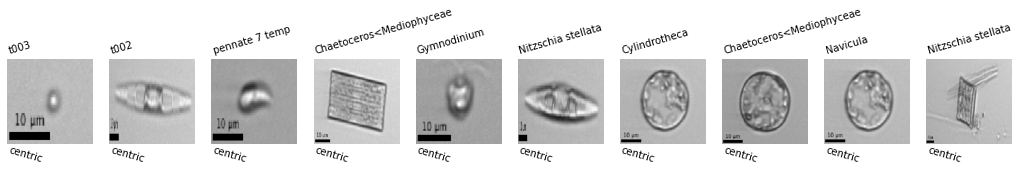

In [230]:
fig, ax = plt.subplots(1, 10, figsize=(18, 10))

indices = np.random.randint(len(X_test), size=(10))
predictions = np.argmax(model.predict(X_test[indices]), axis=1)
labs = np.argmax(y_test, axis=1)

for i in range(0, 10):
    ax[i].imshow(X_test[indices[i]].reshape((150, 150)), cmap = 'gray')
    ax[i].axis('off')
    ax[i].text(0,-10, id_class_dict[labs[i-1]], rotation=16)
    
    ax[i].text(0,180, id_class_dict[predictions[i-1]],rotation=-16)
plt.show()

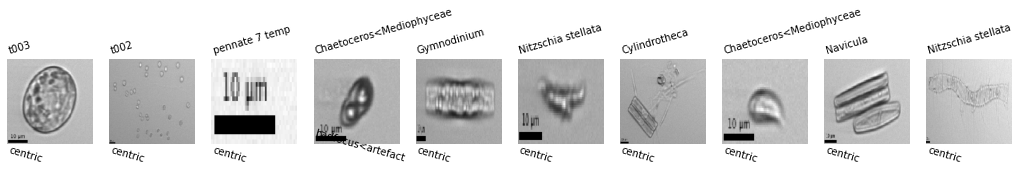

In [231]:
fig, ax = plt.subplots(1, 10, figsize=(18, 10))

indices = np.random.randint(len(X_test), size=(10))
predictions = np.argmax(model.predict(X_test[indices]), axis=1)
labs = np.argmax(y_test, axis=1)

for i in range(0, 10):
    ax[i].imshow(X_test[indices[i]].reshape((150, 150)), cmap = 'gray')
    ax[i].axis('off')
    ax[i].text(0,-10, id_class_dict[labs[i-1]], rotation=16)
    
    ax[i].text(0,180, id_class_dict[predictions[i-1]],rotation=-16)
plt.show()

### Medium Model

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.summary()

In [ ]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)
    
    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=1)

In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

### Deeper Fine-Tuned Model

In [34]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = Xception(weights='imagenet')

img_path = fp
img = image.load_img(img_path, target_size=(299, 299), color_mode="rgb")
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02708093', 'analog_clock', 0.4886681), ('n02910353', 'buckle', 0.28389433), ('n03942813', 'ping-pong_ball', 0.14777376)]


(299, 299, 3)
(1, 299, 299, 3)
(1, 299, 299, 3)


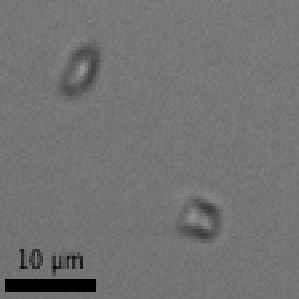

In [55]:
img = image.load_img(fp, target_size=(299, 299), color_mode="rgb")
x = image.img_to_array(img)
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
preprocess_input(x)
print(x.shape)
img

In [17]:
model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_7[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________